In [76]:
import matplotlib.pyplot as plt
import h5py
from numpy import *
import numpy as np
from scipy import stats
from bar_funcs import *

In [77]:
plt.rc('text', usetex=True)
plt.rcParams['font.size'] = 15

Snapshot final

In [201]:
#snapshot = 'satelites/sat01-30/snapshot_120.hdf5'
snapshot = 'barrada/snapshot_280.hdf5'

f = h5py.File(snapshot, 'r')

print(list(f.keys()))
print(f['Header'].attrs['Time'])

['Config', 'Header', 'Parameters', 'PartType1', 'PartType2', 'PartType3']
14.00390625


In [202]:
# f_gas = f['PartType0']
f_dm = f['PartType1']
f_disk = f['PartType2']
# f_bulge = f['PartType3']
# f_star = f['PartType4']
# f_bndry = f['PartType5']

In [203]:
print(list(f_disk.keys()))

['Coordinates', 'Masses', 'ParticleIDs', 'Velocities']


In [204]:
x_disk = np.array(f_disk['Coordinates'][:,0])
y_disk = np.array(f_disk['Coordinates'][:,1])
z_disk = np.array(f_disk['Coordinates'][:,2])
m_disk = np.array(f_disk['Masses'])
id = np.array(f_disk['ParticleIDs'])
vx_disk = np.array(f_disk['Velocities'][:,0])
vy_disk = np.array(f_disk['Velocities'][:,1])
vz_disk = np.array(f_disk['Velocities'][:,2])
Ndisk = len(np.array(f_disk['ParticleIDs']))

In [205]:
x_new_disk, y_new_disk, z_new_disk = shift_com(m_disk, x_disk, y_disk, z_disk)
vx_new_disk, vy_new_disk, vz_new_disk = shift_com(m_disk, vx_disk, vy_disk, vz_disk)
                
theta, phi = theta_phi(N=Ndisk, x=x_new_disk, y=y_new_disk, z=z_new_disk, vx=vx_new_disk,
                               vy=vy_new_disk, vz=vz_new_disk, m=m_disk)
        
x, y, vx, vy = angular_momentum_1(N=Ndisk, x=x_new_disk, y=y_new_disk, vx=vx_new_disk,
                                          vy=vy_new_disk, theta=theta)
       
x, z, vx, vz = angular_momentum_2(N=Ndisk, x=x, z=z_new_disk, vx=vx, vz=vz_new_disk, phi=phi)

In [206]:
R = np.sqrt(x**2 + y**2)

In [207]:
cond1 = np.argwhere((z > 3.0)& (R > 15.0)).flatten()
ids_warp_up = id[cond1]
print(ids_warp_up)
len(ids_warp_up)

[1078226 1005517 1163152 1183492 1124395 1184316 1086635 1063224 1180320
 1160430 1192180 1166236 1191686 1013873 1049883 1137042 1058882 1044835
 1000953 1028786 1199172 1115697 1174753 1077236 1184122 1159843 1180247
 1047333 1184812 1111613 1172674 1025722 1146090 1098417 1010388 1185339
 1182846 1171468 1054151 1191663 1017584 1045342 1024122 1196445 1185982
 1100118 1135215 1000117 1190117 1112062 1197687 1059885 1177099 1131505
 1055234 1192486 1012334 1165527 1127155 1031608 1115720 1077070 1146442
 1166671 1165859 1126582 1048493 1154315 1094929 1129325 1058430 1130672
 1177613 1047353 1048534 1051641 1074991 1082728 1114175 1060907 1187708
 1100285 1113319 1019642 1077000 1139493 1191845 1085181 1139976 1017022
 1173224 1172269 1045022 1104745 1050790 1094888 1139380 1151968 1102030
 1043081 1182356 1190515 1189758 1161504 1017919 1073296 1058260 1033018
 1167423 1079226 1139750 1010317 1070760 1107451 1034335 1000001 1120097
 1168341 1074447 1019101 1137039 1022890 1075389 11

507

In [208]:
cond2 = np.argwhere((z < -3.0) & (R > 15.0)).flatten()
ids_warp_down = id[cond2]
print(ids_warp_down)
len(ids_warp_down)

[1058233 1171249 1065402 1163263 1054618 1111882 1050365 1121918 1037195
 1074367 1126278 1121411 1040358 1007555 1053129 1088449 1156172 1157972
 1095248 1128965 1085831 1077721 1035920 1064244 1024180 1113786 1125585
 1178113 1154983 1025180 1092261 1052640 1177164 1012791 1049472 1182106
 1059836 1096407 1120604 1081013 1143285 1011009 1135106 1063874 1069403
 1188735 1002488 1103914 1031147 1029201 1138394 1024556 1096469 1040998
 1101835 1124232 1145560 1107177 1178473 1129597 1042312 1020281 1133876
 1028753 1149721 1016829 1129308 1041338 1181288 1031675 1009241 1081284
 1166228 1080392 1182600 1070043 1142519 1005564 1069386 1134943 1022203
 1137063 1116845 1009918 1096154 1056520 1058309 1055785 1114280 1048879
 1120747 1191437 1020726 1151417 1140810 1060992 1021959 1123694 1136535
 1054541 1098225 1119700 1024759 1190441 1060314 1191989 1041816 1133935
 1173337 1069138 1057130 1018721 1129029 1158749 1077818 1043916 1180384
 1012096 1053443 1173855 1181130 1026613 1161120 10

513

In [209]:
x_warp_down = []
y_warp_down = []
z_warp_down = []

x_warp_up = []
y_warp_up = []
z_warp_up = []

for i in ids_warp_down:
    x_warp_down.append(x[id==i][0])
    y_warp_down.append(y[id==i][0])
    z_warp_down.append(z[id==i][0])

for i in ids_warp_up:
    x_warp_up.append(x[id==i][0])
    y_warp_up.append(y[id==i][0])
    z_warp_up.append(z[id==i][0])

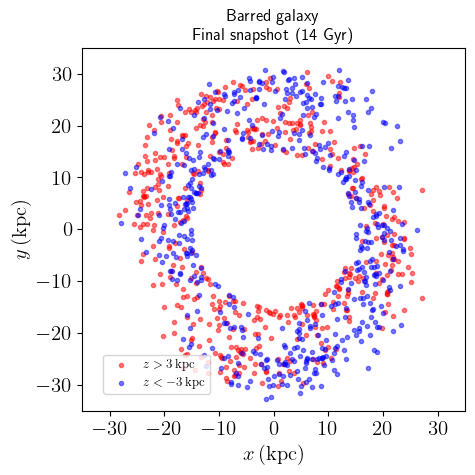

In [210]:
plt.figure(figsize=[5,5])#, dpi=300)

plt.scatter(x_warp_up, y_warp_up, label= '$z > 3 \, \mathrm{kpc}$', marker='.', alpha=0.5, 
            color='red')
plt.scatter(x_warp_down, y_warp_down, label= '$z < -3 \, \mathrm{kpc}$', marker='.', alpha=0.5, 
            color='blue')
plt.xlabel('$x \, \mathrm{(kpc)}$', fontsize=15)
plt.ylabel('$y \, \mathrm{(kpc)}$', fontsize=15)
plt.xlim(-35, 35)
plt.ylim(-35, 35)
plt.xticks([-30, -20, -10, 0, 10, 20, 30])
plt.legend(frameon=True, fontsize=9, loc="center right", bbox_to_anchor=(0.35,0.1))
#plt.title('Barred galaxy + satellite ' + r'($M = 0.1 \times 10^{10}\mathrm{{M}_\odot}, \,r = 30 \, \mathrm{kpc}$)' + '\n Final snapshot (14 Gyr)', fontsize=12)
plt.title('Barred galaxy' + '\n Final snapshot (14 Gyr)', fontsize=12)
plt.tight_layout()
plt.savefig('pos_warp_final_b.png')

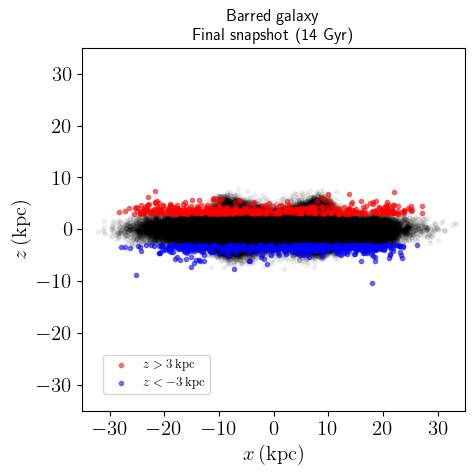

In [211]:
plt.figure(figsize=[5,5])#, dpi=300)

plt.scatter(x, z, marker='.', alpha=0.05, color='black')
plt.scatter(x_warp_up, z_warp_up, label= '$z > 3 \, \mathrm{kpc}$', marker='.', alpha=0.5, 
            color='red')
plt.scatter(x_warp_down, z_warp_down, label= '$z < -3 \, \mathrm{kpc}$', marker='.', alpha=0.5, 
            color='blue')
plt.xlabel('$x \, \mathrm{(kpc)}$', fontsize=15)
plt.ylabel('$z \, \mathrm{(kpc)}$', fontsize=15)
plt.xlim(-35, 35)
plt.ylim(-35, 35)
plt.xticks([-30, -20, -10, 0, 10, 20, 30])
plt.legend(frameon=True, fontsize=9, loc="center right", bbox_to_anchor=(0.35,0.1))
#plt.title('Barred galaxy + satellite ' + r'($M = 0.1 \times 10^{10}\mathrm{{M}_\odot}, \,r = 30 \, \mathrm{kpc}$)' + '\n Final snapshot (14 Gyr)', fontsize=12)
plt.title('Barred galaxy' + '\n Final snapshot (14 Gyr)', fontsize=12)
plt.tight_layout()
plt.savefig('pos_warp_final_b_2.png')

Snapshot inicial

In [217]:
#snapshot = 'satelites/sat01-30/snapshot_000.hdf5'
snapshot = 'barrada/snapshot_160.hdf5'

f = h5py.File(snapshot, 'r')

print(list(f.keys()))
print(f['Header'].attrs['Time'])

f_disk = f['PartType2']

x_disk = np.array(f_disk['Coordinates'][:,0])
y_disk = np.array(f_disk['Coordinates'][:,1])
z_disk = np.array(f_disk['Coordinates'][:,2])
m_disk = np.array(f_disk['Masses'])
id = np.array(f_disk['ParticleIDs'])
vx_disk = np.array(f_disk['Velocities'][:,0])
vy_disk = np.array(f_disk['Velocities'][:,1])
vz_disk = np.array(f_disk['Velocities'][:,2])
Ndisk = len(np.array(f_disk['ParticleIDs']))

x_new_disk, y_new_disk, z_new_disk = shift_com(m_disk, x_disk, y_disk, z_disk)
vx_new_disk, vy_new_disk, vz_new_disk = shift_com(m_disk, vx_disk, vy_disk, vz_disk)
                
theta, phi = theta_phi(N=Ndisk, x=x_new_disk, y=y_new_disk, z=z_new_disk, vx=vx_new_disk,
                               vy=vy_new_disk, vz=vz_new_disk, m=m_disk)
        
x, y, vx, vy = angular_momentum_1(N=Ndisk, x=x_new_disk, y=y_new_disk, vx=vx_new_disk,
                                          vy=vy_new_disk, theta=theta)
       
x, z, vx, vz = angular_momentum_2(N=Ndisk, x=x, z=z_new_disk, vx=vx, vz=vz_new_disk, phi=phi)

['Config', 'Header', 'Parameters', 'PartType1', 'PartType2', 'PartType3']
7.998046875


In [218]:
x_warp_down_ini = []
y_warp_down_ini = []
z_warp_down_ini = []

x_warp_up_ini = []
y_warp_up_ini = []
z_warp_up_ini = []

for i in ids_warp_down:
    x_warp_down_ini.append(x[id==i][0])
    y_warp_down_ini.append(y[id==i][0])
    z_warp_down_ini.append(z[id==i][0])

for i in ids_warp_up:
    x_warp_up_ini.append(x[id==i][0])
    y_warp_up_ini.append(y[id==i][0])
    z_warp_up_ini.append(z[id==i][0])

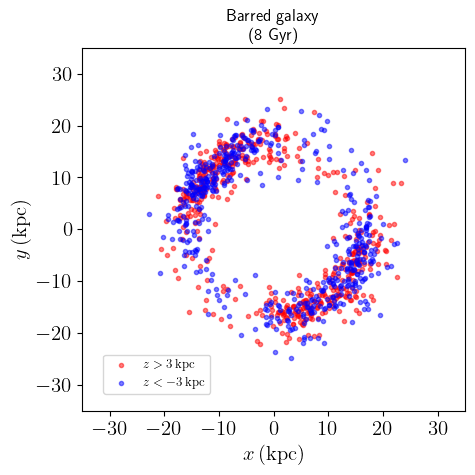

In [219]:
plt.figure(figsize=[5,5])#, dpi=300)

plt.scatter(x_warp_up_ini, y_warp_up_ini, label= '$z > 3 \, \mathrm{kpc}$', marker='.', alpha=0.5, 
            color='red')
plt.scatter(x_warp_down_ini, y_warp_down_ini, label= '$z < -3 \, \mathrm{kpc}$', marker='.', alpha=0.5, 
            color='blue')
plt.xlabel('$x \, \mathrm{(kpc)}$', fontsize=15)
plt.ylabel('$y \, \mathrm{(kpc)}$', fontsize=15)
plt.xlim(-35, 35)
plt.ylim(-35, 35)
plt.xticks([-30, -20, -10, 0, 10, 20, 30])
plt.legend(frameon=True, fontsize=9, loc="center right", bbox_to_anchor=(0.35,0.1))
#plt.title('Barred galaxy + satellite ' + r'($M = 0.1 \times 10^{10}\mathrm{{M}_\odot}, \,r = 30 \, \mathrm{kpc}$)' + '\n Initial snapshot (8 Gyr)', fontsize=12)
plt.title('Barred galaxy' + '\n (8 Gyr)', fontsize=12)
plt.tight_layout()
plt.savefig('pos_warp_ini_b_.png')

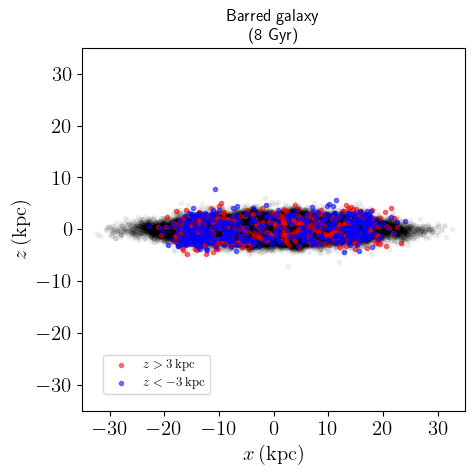

In [220]:
plt.figure(figsize=[5,5])#, dpi=300)

plt.scatter(x, z, marker='.', alpha=0.05, color='black')
plt.scatter(x_warp_up_ini, z_warp_up_ini, label= '$z > 3 \, \mathrm{kpc}$', marker='.', alpha=0.5, 
            color='red')
plt.scatter(x_warp_down_ini, z_warp_down_ini, label= '$z < -3 \, \mathrm{kpc}$', marker='.', alpha=0.5, 
            color='blue')
plt.xlabel('$x \, \mathrm{(kpc)}$', fontsize=15)
plt.ylabel('$z \, \mathrm{(kpc)}$', fontsize=15)
plt.xlim(-35, 35)
plt.ylim(-35, 35)
plt.xticks([-30, -20, -10, 0, 10, 20, 30])
plt.legend(frameon=True, fontsize=9, loc="center right", bbox_to_anchor=(0.35,0.1))
plt.title('Barred galaxy + satellite ' + r'($M = 0.1 \times 10^{10}\mathrm{{M}_\odot}, \,r = 30 \, \mathrm{kpc}$)' + '\n Initial snapshot (8 Gyr)', fontsize=12)
plt.title('Barred galaxy' + '\n (8 Gyr)', fontsize=12)
plt.tight_layout()
plt.savefig('pos_warp_ini_b_2_.png')